In [38]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from influxdb import InfluxDBClient

In [39]:
class Measure:
    temperature = 0
    humidity = 0

In [40]:
def get_moisture(alias):
    results = client.query('select last("Moisture") from "Flowers" where alias = \'' + alias + '\'')
    return results.raw['series'][0]['values'][0][1]

In [41]:
def get_measure(alias):
    results = client.query('select last("Temperature") as temperature,last( "Humidity") as humidity from Telemetry where alias = \'' + alias + '\'')
    measure = Measure()
    measure.temperature = results.raw['series'][0]['values'][0][1]
    measure.humidity = results.raw['series'][0]['values'][0][2]
    
    return measure

In [72]:
def getLevelIcon(level):
    if level < 10:
        return levelIcons[0]
    elif level < 13:
        return levelIcons[1]
    elif level < 16:
        return levelIcons[2]    
    elif level < 19:
        return levelIcons[3]
    else:
        return levelIcons[4]

In [74]:
def humidity_color(humidity):
    if humidity < 40 or humidity > 60:
        return 'red'
    else:
        return 'black'

In [43]:
client = InfluxDBClient(host='192.168.13.30', port=8086)

In [44]:
client.switch_database('garden')

In [45]:
workRoom = get_measure('workRoomTempSensor')
livRoom = get_measure('livRoomTempSensor')
SashaRoom = get_measure('SashaRoomTempSensor')
bedRoom = get_measure('bedRoomTempSensor')

In [46]:
oleandrMoisture = get_moisture('flowerOleandrSensor')
olivaMoisture = get_moisture('flowerOlivaSensor')

In [47]:
temperature = [workRoom.temperature, bedRoom.temperature, livRoom.temperature, SashaRoom.temperature]
humidity = [workRoom.humidity, bedRoom.humidity, livRoom.humidity, SashaRoom.humidity]
flowers = [oleandrMoisture, olivaMoisture]

In [48]:
fntName = "BigScreen/fonts/HelveticaNeueCyr-Medium.ttf"
fnt = ImageFont.truetype(fntName, 80)
fntHeader = ImageFont.truetype(fntName, 20)

In [49]:
humidityIcon = Image.open('BigScreen/images/humidity.png', 'r')
temperatureIcon = Image.open('BigScreen/images/temperature.png', 'r')
oliveIcon = Image.open('BigScreen/images/olive.png', 'r')
oleandrIcon = Image.open('BigScreen/images/oleandr.png', 'r')

levelIcons = [Image.open('BigScreen/images/level1.png', 'r'), Image.open('BigScreen/images/level2.png', 'r'), Image.open('BigScreen/images/level3.png', 'r'), Image.open('BigScreen/images/level4.png', 'r'), Image.open('BigScreen/images/level5.png', 'r')]

In [50]:
size = (800, 480)
cornersLeft = [(12, 20), (275, 20), (538, 20), (12, 250), (275, 250), (538, 250)]
cardSize = (250, 210)
headerSize = (180, 30)

In [75]:
img = Image.new('RGB', size, color = 'white')
draw = ImageDraw.Draw(img)

In [76]:
for i in range(6):
    draw.rectangle([cornersLeft[i], tuple(np.add(cornersLeft[i], cardSize))], fill = 'white', outline = 'black')
    draw.rectangle([tuple(np.add(cornersLeft[i], (70, 0))), tuple(np.add(cornersLeft[i], headerSize))], fill = 'white', outline = 'black')
    
for i in range(4):
    img.paste(temperatureIcon, tuple(np.add(cornersLeft[i], (41, 47))))
    img.paste(humidityIcon, tuple(np.add(cornersLeft[i], (38, 132))))

img.paste(oliveIcon, (543, 300))
img.paste(oleandrIcon, (278, 300))

In [77]:
draw.text((92, 27), 'КАБИНЕТ', font = fntHeader, fill = 'black')
draw.text((352, 27), 'СПАЛЬНЯ', font = fntHeader, fill = 'black')
draw.text((643, 27), 'ЗАЛ', font = fntHeader, fill = 'black')
draw.text((92, 257), 'ПЕЩЕРА', font = fntHeader, fill = 'black')
draw.text((352, 257), 'ОЛЕАНДР', font = fntHeader, fill = 'black')
draw.text((628, 257), 'ОЛИВА', font = fntHeader, fill = 'black')

In [78]:
for i in range(4):
    draw.text(tuple(np.add(cornersLeft[i], (140, 50))), '{:2.0f}'.format(temperature[i]), font = fnt, fill = 'black')
    draw.text(tuple(np.add(cornersLeft[i], (140, 132))), '{:2.0f}'.format(humidity[i]), font = fnt, fill = humidity_color(humidity[i]))

#draw.text((415, 340), str(flowers[0]), font = fnt, fill = 'red')
#draw.text((678, 340), str(flowers[1]), font = fnt, fill = 'black')

img.paste(getLevelIcon(flowers[0]), (417, 325))
img.paste(getLevelIcon(flowers[1]), (680, 325))

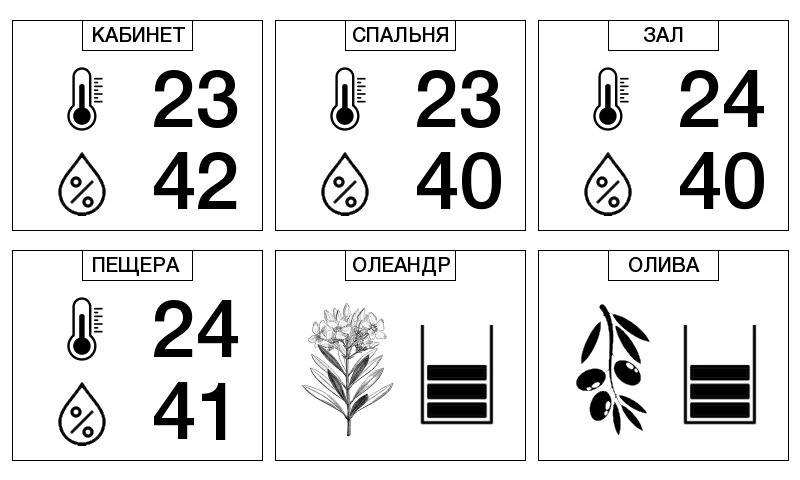

In [79]:
display(img)